In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pylab as plt

f:\Dropbox\Projects\nlp_transformers_labs\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the emotion dataset
# !!! The dataset contains custom code, possible security risk for unknown datasets
emotions = load_dataset("emotion", trust_remote_code=True)
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [4]:
# Select the train split and exploring the methods and attributes
train_ds = emotions['train']
print(train_ds)
print('\nDataset info:')
print(train_ds.info)
print('\nDataset length:')
print(len(train_ds))
print('\nDataset first item:')
print(train_ds[0])
print('\nDataset first item keys:')
print(train_ds[0].keys())
print('\nDataset features:')
print(train_ds.features)
print('\nDataset slice :5 :')
print(train_ds[:5])
print('\nDataset slice of text :5 :')
print(train_ds['text'][:5])

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

Dataset info:
DatasetInfo(description='Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.\n', citation='@inproceedings{saravia-etal-2018-carer,\n    title = "{CARER}: Contextualized Affect Representations for Emotion Recognition",\n    author = "Saravia, Elvis  and\n      Liu, Hsien-Chi Toby  and\n      Huang, Yen-Hao  and\n      Wu, Junlin  and\n      Chen, Yi-Shin",\n    booktitle = "Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing",\n    month = oct # "-" # nov,\n    year = "2018",\n    address = "Brussels, Belgium",\n    publisher = "Association for Computational Linguistics",\n    url = "https://www.aclweb.org/anthology/D18-1404",\n    doi = "10.18653/v1/D18-1404",\n    pages = "3687--3697",\n    abstract = "Emotions are expressed in nuanced ways, which

In [5]:
# From Datasets to DataFrames to plot and explore the data
emotions.set_format(type='pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [6]:
# .features attribute is allows to access the data types of each column in the dataset based on Apache Arrow
# the datatype ClassLabel contains the mapping between the integer labels and the string labels
# ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)

def label_int2str(idx): # renamed row with idx, since we are passing single value from each row, 'label' column
    return emotions['train'].features['label'].int2str(idx)

df['label_name'] =df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


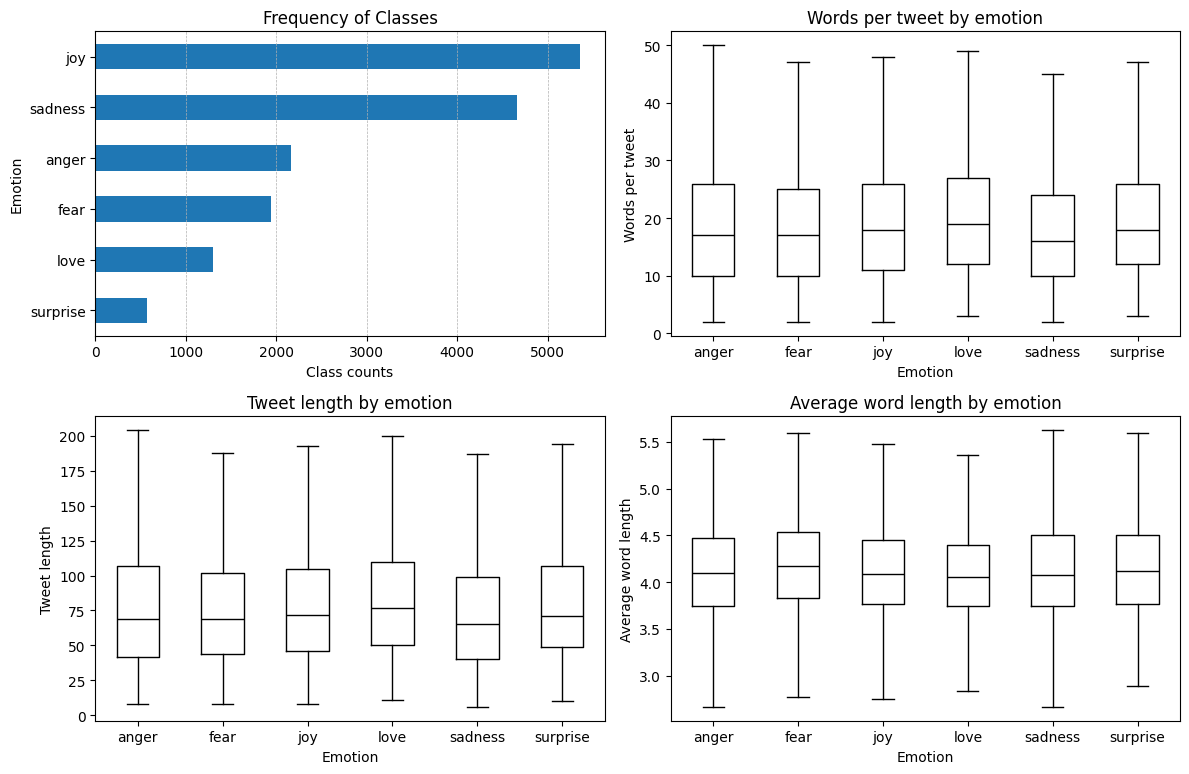

In [7]:
# Plotting the data

# Text length distribution
df['words_per_tweet'] = df['text'].str.split(' ').apply(len)#.apply(lambda x: len(x.split()))
df['tweet_length'] = df['text'].str.replace(' ', '').apply(len)
df['average_word_length'] = df['tweet_length'] / df['words_per_tweet']
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

#Class distribution
ax[0, 0] = df['label_name'].value_counts(ascending=True).plot.barh(ax=ax[0, 0])
ax[0, 0].set_title('Frequency of Classes')
ax[0, 0].set_xlabel('Class counts')
ax[0, 0].set_ylabel('Emotion')
ax[0, 0].grid(axis='x', linestyle='--', linewidth=0.5)


# Words per tweet distribution
ax[0, 1] = df.boxplot(column='words_per_tweet', by='label_name', ax=ax[0, 1], grid = False, showfliers=False, color='black')
ax[0, 1].set_title('Words per tweet by emotion')
ax[0, 1].set_ylabel('Words per tweet')
ax[0, 1].set_xlabel('Emotion')
ax[0, 1].get_figure().suptitle('')

# Tweet length distribution
ax[1, 0] = df.boxplot(column='tweet_length', by='label_name', ax=ax[1, 0], grid = False, showfliers=False, color='black')
ax[1, 0].set_title('Tweet length by emotion')
ax[1, 0].set_ylabel('Tweet length')
ax[1, 0].set_xlabel('Emotion')
ax[1, 0].get_figure().suptitle('')

# Average word length distribution
ax[1, 1] = df.boxplot(column='average_word_length', by='label_name', ax=ax[1, 1], grid = False, showfliers=False, color='black')
ax[1, 1].set_title('Average word length by emotion')
ax[1, 1].set_ylabel('Average word length')
ax[1, 1].set_xlabel('Emotion')
ax[1, 1].get_figure().suptitle('')


plt.tight_layout()
plt.show()



In [19]:
#Reset the format the dataset
emotions.reset_format()
#check the first 5 items
emotions['train'][:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}